# Assignment 1.1 : Logistic Regression with a Single Feature

## AI (Ojaswi Banskota) ACE079BCT040


### Introduction to Artificial Intelligence and Machine Learning

- **Artificial Intelligence (AI)** refers to the capability of machines to simulate human intelligence such as learning, reasoning, and decision-making.
- **Machine Learning (ML)** is a subfield of AI that enables systems to learn patterns from data and improve performance without explicit programming.
- In **supervised learning**, models are trained using labeled datasets to predict known target outputs.
- **Logistic Regression** is a supervised machine learning algorithm used for **binary classification** problems.
- It predicts the probability of an outcome using a sigmoid function and classifies results into two classes.
- In this assignment, logistic regression is used to predict the **presence or absence of heart disease** based on input features.


## 1) Required Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

## 2) Data Retrieval and Collection
 -  Data retrieval and collection is the first step in any ML pipeline, involving gathering relevant raw data from diverse sources such as databases,   APIs, sensors, and third-party providers.
 - Good collection practices ensure the data is representative, timely, and accompanied by metadata that supports reproducibility and traceability.
-  Attention to data quality, privacy, and legal constraints during collection helps prevent bias and compliance issues later in the pipeline.
 - Well-documented and structured retrieval workflows reduce downstream cleaning effort and improve model reliability.

In [2]:
 df = pd.read_csv("Heart_Disease_Prediction.csv")

In [3]:
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [12]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [13]:
# Input feature
features = df[['Cholesterol']]  # must be a DataFrame for sklearn

# Target variable
labels = df['Heart Disease']  # string column like 'Presence'/'Absence'

# Convert target to numeric
labels_numeric = labels.map({'Absence':0, 'Presence':1})



#### features are also called inputs. And, labels are also called targets

In [14]:
# check the shape of the dataset
print("Features shape:", features.shape)
print("Labels shape:", labels.shape)

Features shape: (270, 1)
Labels shape: (270,)


In [15]:
# check the type of data

print("Features type:", type(features))
print("Labels type:", type(labels))

Features type: <class 'pandas.core.frame.DataFrame'>
Labels type: <class 'pandas.core.series.Series'>


In [16]:
# let's  understand the data
features.head(5) # first 5 rows of the features dataframe

,Cholesterol
0,322
1,564
2,261
3,263
4,269


In [17]:
labels_numeric.tail(5) # last 5 rows of the labels dataframe/series

265    0
266    0
267    0
268    0
269    1
Name: Heart Disease, dtype: int64

#### Note: The labels indicates presence(1) or absence(0) of the heart disease
#### Here, this means this is a classification task

#### Describing the dataset
The `features.describe()` function provides a statistical summary of all input features. 
It shows the count, mean, standard deviation, minimum, quartiles (25%, 50%, 75%), and maximum values for each feature. 

This helps us understand:
- The range of values for each attribute
- Whether there are extreme values or potential outliers
- The scale differences between features, which is important before applying Logistic Regression


In [18]:
features.describe()

,Cholesterol
count,270.000000
mean,249.659259
std,51.686237
min,126.000000
25%,213.000000
50%,245.000000
75%,280.000000
max,564.000000


## Common Statistical Outputs:
#### count: Number of non-NaN values.
#### mean: The average of the values.
#### std: Standard deviation of the values.
#### min: The smallest value.
#### 25%: The 25th percentile (first quartile); means that 25% of the values in your data are below this number.
#### 50%: The median (second quartile).
#### 75%: The 75th percentile (third quartile).
#### max: The largest value.

### Here, we are going to focus on : **Cholesterol**.  
This is done to simplify visualization and understanding of how Logistic Regression works.  
In the final model, all features will be used, but for illustration, we will start with these two.


In [19]:
# Focusing on Cholesterol as the single input feature
cholesterol_feature = df[['Cholesterol']]
cholesterol_feature.head()



,Cholesterol
0,322
1,564
2,261
3,263
4,269


In [20]:
# Convert 'Heart Disease' labels to 0/1
labels_numeric = labels.map({'Absence': 0, 'Presence': 1})
labels_numeric

0      1
1      0
2      1
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    1
Name: Heart Disease, Length: 270, dtype: int64

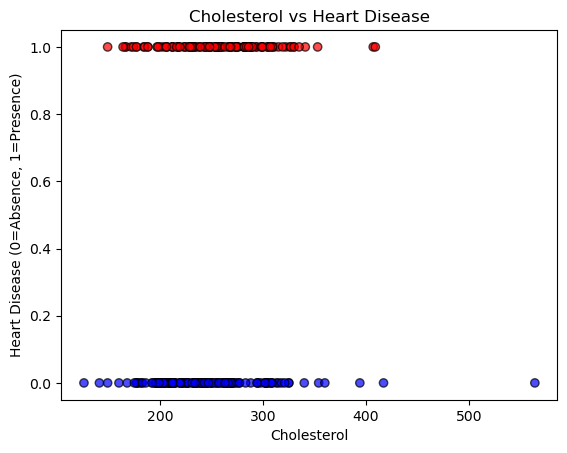

In [21]:
import matplotlib.pyplot as plt

plt.scatter(cholesterol_feature['Cholesterol'], labels_numeric, 
            c=labels_numeric, cmap='bwr', edgecolor='k', alpha=0.7)
plt.xlabel('Cholesterol')
plt.ylabel('Heart Disease (0=Absence, 1=Presence)')
plt.title('Cholesterol vs Heart Disease')
plt.show()



### The scatter plot shows the relationship between **Cholesterol** and **Heart Disease** for all patients.  

- The **X-axis** represents patient cholesterol levels.  
- The **Y-axis** represents the presence of heart disease: 1 for presence, 0 for absence.  
- The **color** indicates whether the patient has heart disease: red for presence, blue for absence.  

From the plot, we can observe patterns such as:  
- Patients with higher cholesterol levels are more likely to have heart disease (more red points at higher X values).  
- Patients with lower cholesterol levels are more likely to be healthy (more blue points at lower X values).  
- There is some overlap, meaning cholesterol alone does not perfectly separate the classes.


In [22]:
labels

0      Presence
1       Absence
2      Presence
3       Absence
4       Absence
         ...   
265     Absence
266     Absence
267     Absence
268     Absence
269    Presence
Name: Heart Disease, Length: 270, dtype: object

### For this example, we are going to use logistic regression which, despite its name, is a ;linear classification model.

To use the Logistic Regression classifier, we must first import it using the following line of code:

In [23]:
from sklearn.linear_model import LogisticRegression

## 3) Data Cleaning

### Practical datasets often have
- missing values,
- improperly scaled measurements,
- outlier data points, or
- non-numeric structured data (like strings)
- that cannot be directly fed into the ML algorithm.

- Feature scaling is one of the most critical pre-processing steps in machine learning, with the most common techniques being standardization and normalization.

- Machine learning algorithms that calculate distance or assume normality are sensitive to relative scales of features, meaning that if the data is not scaled, features with a higher value range start dominating the model's decision-making process. Feature scaling is therefore needed to bring features with different ranges into comparable ranges.

- Feature scaling also allows for much faster model convergence.

- In this scenario, we are going to use the sci-kit learn StandardScaler to standardize our data. Another commonly used scaler is the MinMax scaler. The MinMax scaler normalizes data.

#### Standardization (z-score)
- Shift the data so its average is 0 and scale it so a “typical” spread is 1. Useful when features have very different units (e.g., cm vs kg) so they contribute comparably to algorithms that use distances or assume roughly normal inputs.
- Formula: z = (x − μ) / σ
  - μ = mean of the feature, σ = standard deviation of the feature

### Normalization (min–max)
- Squeeze the data into a fixed range (commonly 0 to 1). Keeps the shape of the distribution but rescales extremes to the chosen bounds — useful for neural nets or when you need values in a known interval.
1. Formula (to [0, 1]): This formula scales the values of ( x ) to a range between 0 and 1.
 - x' = (x - xmin) / (xmax - xmin)
 - x is the original value,
 - xmin is the minimum value in the dataset,
 - xmax is the maximum value in the dataset,
 - x' is the normalized value between 0 and 1.
 2. Variant (to [−1, 1]): This variant scales the values of ( x ) to a range between -1 and 1.
   - x' = 2 * {(x - xmin) / (xmax - xmin)} - 1
   - x' is the normalized value between -1 and 1


In [24]:
# Scaling (Standardization)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Apply standardization to Cholesterol
standardized_cholesterol = pd.DataFrame(scaler.fit_transform(cholesterol_feature),
                                       columns=['Cholesterol'])

# Show the first 5 rows of standardized data
standardized_cholesterol.head(5)


,Cholesterol
0,1.402212
1,6.093004
2,0.219823
3,0.258589
4,0.374890


### Note: In practice, before training a model, we should check for outliers, encode categorical features into numeric values, and scale all features. These preprocessing steps ensure that the model performs correctly and efficiently. For simplicity, in this demonstration, we focus only on numeric features and apply standardization.


In [25]:
# Summary statistics for Cholesterol
cholesterol_feature.describe()


,Cholesterol
count,270.000000
mean,249.659259
std,51.686237
min,126.000000
25%,213.000000
50%,245.000000
75%,280.000000
max,564.000000


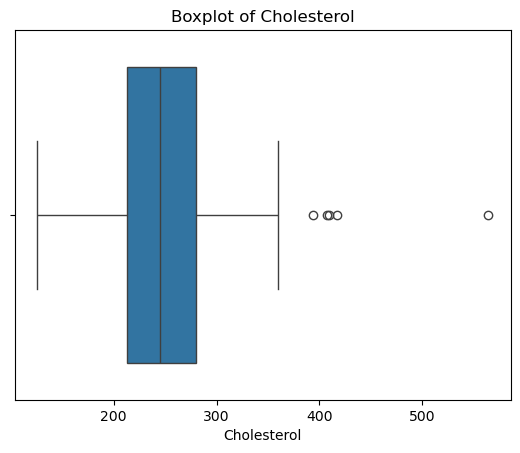

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for Cholesterol
sns.boxplot(x=cholesterol_feature['Cholesterol'])
plt.xlabel('Cholesterol')
plt.title('Boxplot of Cholesterol')
plt.show()


## 4) Feature Design

#### 4.1) Feature Transformation
- Feature transformation converts raw dataset values into numeric form suitable for machine learning models.  
- In this assignment, the input feature is **Cholesterol**, which is already numeric.  
- We apply **standardization** so that Cholesterol has mean 0 and standard deviation 1,  
  ensuring stable and faster convergence during model training.

#### 4.2) Feature Engineering
- Feature engineering involves creating new features from raw data to capture useful relationships.  
- Since this assignment uses **only one feature (Cholesterol)**, no additional features are created.  
- In more complex datasets, domain knowledge could be used to combine features or calculate ratios to improve predictive power.

#### 4.3) Feature Selection
- Feature selection removes irrelevant or harmful features from the dataset to improve model accuracy and reduce overfitting.  
- In this assignment, we **only use the Cholesterol feature**, so no feature selection is needed.  
- In larger datasets, automated or manual methods can help identify the most important features.



In [27]:
from sklearn.model_selection import train_test_split

# Use standardized Cholesterol and numeric labels
x_train, x_test, y_train, y_test = train_test_split(
    standardized_cholesterol,  # standardized Cholesterol
    labels_numeric,             # 0 = Absence, 1 = Presence
    test_size=0.20,             # 20% test, 80% train
    shuffle=True,               # shuffle data to avoid batch bias
    random_state=42             # reproducible split
)

# Verify shapes
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



x_train shape: (216, 1)
x_test shape: (54, 1)
y_train shape: (216,)
y_test shape: (54,)


#### **Train-Test Split**

To evaluate the performance of our Logistic Regression model, we separate the dataset into a **training set** and a **test set**.  

- **Why**: Training and testing on the same data can lead to overfitting, where the model memorizes the data rather than learning general patterns.  
- **How**: We use `train_test_split` with 80% of the data for training and 20% for testing.  
- **Shuffle**: Ensures the data is randomly distributed to avoid batch effects.  
- **Random state**: Guarantees reproducibility of the split across multiple runs.  

This split allows us to train the model on one portion of the data and evaluate its predictive performance on unseen examples.


## 5) Algorithm Selection (Single Feature)

For this assignment, we are using **Logistic Regression** with a single input feature.  

**Problem type:**  
- The target variable is `Heart Disease` (Presence = 1, Absence = 0).  
- This is a **binary classification problem**.  

**Why Logistic Regression:**  
- Logistic Regression predicts the probability of the positive class using the **sigmoid function**:  

$$
P(Y=1|X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X)}} 
$$

Where:  
- $X$ → input feature (**Cholesterol**)  
- $\beta_0$ → intercept term  
- $\beta_1$ → coefficient for Cholesterol  

- Using a single feature simplifies interpretation and visualization.  
- It allows us to understand the relationship between cholesterol levels and the probability of heart disease.  

**Note:**  
- The feature is standardized (mean 0, standard deviation 1) before training.



In [28]:
# Select single feature: Cholesterol
single_feature = standardized_cholesterol[['Cholesterol']]  # must be a DataFrame, not Series

# Train-test split (20% test)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    single_feature,
    labels_numeric,
    test_size=0.2,
    shuffle=True,
    random_state=42
)

# Import Logistic Regression and metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create and train the model
model = LogisticRegression()
model.fit(x_train, y_train)

# Predict on test set
y_pred = model.predict(x_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy on test set: 0.6111111111111112

Confusion Matrix:
[[28  5]
 [16  5]]

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.85      0.73        33
           1       0.50      0.24      0.32        21

    accuracy                           0.61        54
   macro avg       0.57      0.54      0.52        54
weighted avg       0.58      0.61      0.57        54



## 6) Loss Function Selection

**What is a loss function?**  
- A loss function quantifies how well the model’s predictions match the true labels.  
- During training, the model tries to **minimize this loss** to improve accuracy.

**For Logistic Regression:**  
- The standard loss function is the **Binary Cross-Entropy Loss** (also called **Log Loss**).  
- It is defined as:

$$
Loss = - \frac{1}{N} \sum_{i=1}^{N} \Big[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \Big]
$$

Where:  
- $N$ → number of training examples  
- $y_i$ → actual label (0 or 1)  
- $\hat{y}_i$ → predicted probability of the positive class  

**Why Binary Cross-Entropy:**  
- Penalizes confident but wrong predictions heavily.  
- Works naturally with **sigmoid outputs** in Logistic Regression.  
- Ensures the model learns to output probabilities close to the true labels.

**Note:**  
- When using `sklearn.linear_model.LogisticRegression`, the loss function is **handled internally**.  
- It is minimized automatically using optimization algorithms like **LBFGS** or **SAG**.


In [29]:
from sklearn.metrics import log_loss

# Predicted probabilities for positive class
y_prob = model.predict_proba(x_test)[:,1]

# Compute Binary Cross-Entropy (Log Loss)
loss = log_loss(y_test, y_prob)
print("Binary Cross-Entropy Loss on test set:", loss)


Binary Cross-Entropy Loss on test set: 0.6611287086722082


**Binary Cross-Entropy Loss**

- The computed log loss measures how well the model’s predicted probabilities match the actual labels.  
- A lower value indicates better predictions.  
- Logistic Regression automatically optimizes this loss during training.  
- By evaluating this loss on the test set, we get an idea of model performance beyond simple accuracy.


## 7) Model Learning (Training)

**What is Model Learning?**  
- Model learning refers to the process of **fitting a machine learning algorithm to the training data**.  
- For Logistic Regression, the model learns the coefficients (weights) that best map the input feature to the probability of the target class.  

**How it works (Logistic Regression):**  
- Logistic Regression uses the **sigmoid function**:

$$
\hat{y} = P(Y=1|X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X)}}
$$

- The model finds the parameters $\beta_0$ (intercept) and $\beta_1$ (coefficient) that **minimize the Binary Cross-Entropy Loss**:

$$
Loss = - \frac{1}{N} \sum_{i=1}^{N} \Big[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \Big]
$$

- The optimization is done using iterative algorithms like **Gradient Descent**, **LBFGS**, or **SAG**.  
- During training, the model updates its parameters to reduce the loss until it converges to the best solution.  

**Training Steps in this Assignment:**  
1. Split the dataset into **training set** (80%) and **test set** (20%).  
2. Standardize the feature (**Cholesterol**) to ensure faster and stable convergence.  
3. Fit the Logistic Regression model on the training data using `fit()`.  
4. Model learns the relationship between **Cholesterol** and the probability of heart disease.


In [30]:
# -------------------------
# 1. Import necessary libraries
# -------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# -------------------------
# 2. Prepare the single feature (Cholesterol)
# -------------------------
single_feature = standardized_cholesterol[['Cholesterol']]  # must be a DataFrame

# -------------------------
# 3. Train-test split
# -------------------------
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    single_feature,
    labels_numeric,
    test_size=0.2,
    shuffle=True,
    random_state=42
)

# -------------------------
# 4. Create and train the model
# -------------------------
model = LogisticRegression()
model.fit(x_train, y_train)

# -------------------------
# 5. Make predictions on test set
# -------------------------
y_pred = model.predict(x_test)

# -------------------------
# 6. Evaluate the model
# -------------------------
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# -------------------------
# 7. Show learned parameters
# -------------------------
print("Intercept (β0):", model.intercept_[0])
print("Coefficient for Cholesterol (β1):", model.coef_[0][0])


Accuracy on test set: 0.6111111111111112

Confusion Matrix:
[[28  5]
 [16  5]]

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.85      0.73        33
           1       0.50      0.24      0.32        21

    accuracy                           0.61        54
   macro avg       0.57      0.54      0.52        54
weighted avg       0.58      0.61      0.57        54

Intercept (β0): -0.16937142374919395
Coefficient for Cholesterol (β1): 0.17773696697102062


**Explanation of the Code**

- **single_feature**: The standardized Cholesterol column used as input.  
- **train_test_split**: Splits the data into training and test sets (80/20).  
- **LogisticRegression()**: Creates the model; `fit()` trains it.  
- **Predictions**: `predict()` outputs 0 or 1 for test samples.  
- **Accuracy**: Fraction of correct predictions.  
- **Confusion Matrix**: Shows true positives, true negatives, false positives, and false negatives.  
- **Classification Report**: Provides precision, recall, and F1-score for each class.  
- **Intercept and Coefficient**: Learned parameters ($\beta_0$ and $\beta_1$) define the relationship between Cholesterol and heart disease probability.


## 8) Model Evaluation



- **Accuracy**: Shows the proportion of correctly classified patients in the test set. A higher accuracy indicates better overall predictions.  
- **Confusion Matrix**:  
  - True Positives (TP): Patients correctly predicted to have heart disease.  
  - True Negatives (TN): Patients correctly predicted as healthy.  
  - False Positives (FP): Healthy patients incorrectly predicted to have heart disease.  
  - False Negatives (FN): Patients with heart disease incorrectly predicted as healthy.  
- **Precision**: Measures how many of the predicted positive cases are actually positive.  
- **Recall (Sensitivity)**: Measures how many of the actual positive cases are correctly identified.  
- **F1-score**: Harmonic mean of precision and recall; useful when the classes are imbalanced.  

**Interpretation Example for Cholesterol Feature:**  
- Higher cholesterol levels tend to increase the probability of heart disease.  
- Some overlap exists; patients with moderate cholesterol may be classified incorrectly.  
- The model gives probabilities, so borderline cases may require clinical judgment.


In [33]:
from sklearn.metrics import f1_score, recall_score, precision_score

# Calculate F1-score, recall, and precision for the positive class (heart disease)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("F1-score:", f1)
print("Recall:", recall)
print("Precision:", precision)


F1-score: 0.3225806451612903
Recall: 0.23809523809523808
Precision: 0.5


- **Precision**: Out of all patients predicted to have heart disease, how many actually have it.  
- **Recall (Sensitivity)**: Out of all patients who actually have heart disease, how many were correctly identified.  
- **F1-score**: Harmonic mean of precision and recall; balances false positives and false negatives.  

**Interpretation:**  
- Higher recall means the model is good at detecting patients with heart disease.  
- F1-score provides a single metric to understand performance when classes might be slightly imbalanced.  


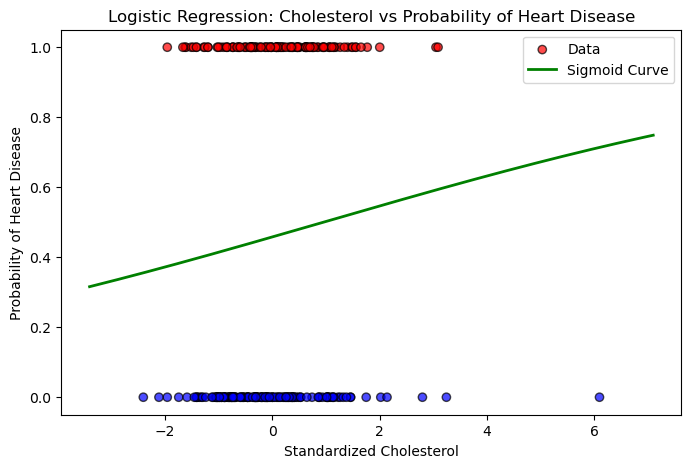

In [32]:
# Generate a range of standardized Cholesterol values for plotting
cholesterol_range = np.linspace(standardized_cholesterol['Cholesterol'].min() - 1,
                                standardized_cholesterol['Cholesterol'].max() + 1, 200).reshape(-1, 1)

# Convert it to a DataFrame with the same column name as training
cholesterol_range_df = pd.DataFrame(cholesterol_range, columns=['Cholesterol'])

# Predict probabilities using the trained model
probabilities = model.predict_proba(cholesterol_range_df)[:, 1]  # probability of heart disease = 1

# Plot the sigmoid curve
plt.figure(figsize=(8,5))
plt.scatter(standardized_cholesterol['Cholesterol'], labels_numeric, 
            c=labels_numeric, cmap='bwr', edgecolor='k', alpha=0.7, label='Data')
plt.plot(cholesterol_range_df, probabilities, color='green', linewidth=2, label='Sigmoid Curve')
plt.xlabel('Standardized Cholesterol')
plt.ylabel('Probability of Heart Disease')
plt.title('Logistic Regression: Cholesterol vs Probability of Heart Disease')
plt.legend()
plt.show()


## Sigmoid Curve: Cholesterol vs Probability of Heart Disease

- The **scatter points** represent the actual patients in the dataset:  
  - **Red points** = patients with heart disease (Presence = 1)  
  - **Blue points** = healthy patients (Absence = 0)  

- The **green curve** shows the Logistic Regression model's predicted probability of heart disease based on **Cholesterol**.  
- The curve is a **sigmoid function**, mapping standardized cholesterol levels to probabilities between 0 and 1.  
- Interpretation:  
  - **Lower cholesterol** → lower probability of heart disease (closer to 0).  
  - **Higher cholesterol** → higher probability of heart disease (closer to 1).  
  - The threshold around 0.5 determines the model’s predicted class.  
- Some overlap exists, meaning cholesterol alone cannot perfectly separate all patients.  
- The sigmoid curve visually illustrates how the model “learns” the relationship between the single feature and the target.
